# Wine Quality Survey
<hr>

### About the Dataset 
<hr>
Wine Quality is public dataset available for research in the University of California, Irvine Machine Learning repository created by Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) in 2009. This repository consists of two dataset, red and white wine samples which consists of data points which includes objective tests (e.g. PH values) and the output is presented by the wine experts based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

Source : <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"></a>

#### Attribute Information

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data)   

12. quality (score between 0 and 10)


In [1]:
# import necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning

In [2]:
# import data sets // Importing both red and white wine data set

data_red = pd.read_csv("winequality-red.csv", sep=";")
data_white = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
data_red.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_white.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* Since there are two dataset with same structure, we could join both the dataset to ease our job. We can do this by adding 
    a extra column color which specifies which kind of whine is it : red / white.
    
* Also the column total_sulphur_dioxide name differs in both the data sets. Therefor we will rename red wine's column name to __total_suphur_dioxide__ from __total_sulphur-dioxide__.

In [5]:
# rename column 

data_red.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

In [6]:
# create a new column "color" with wine type : red / white

data_red['color'] = np.repeat('red',data_red.shape[0])
data_white['color'] = np.repeat('white',data_white.shape[0])

In [7]:
# combine both data sets

data_wine = data_red.append(data_white)

In [8]:
# check for duplicate data
data_wine.duplicated().sum()

1177

* There are 1177 duplicate values there for we must remove them.

In [9]:
# remove duplicates
data_wine = data_wine.drop_duplicates(keep='last')

In [10]:
# check for null values
data_wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

* There are no null values in the data set, we can proceed further.

In [11]:
# shape of new data
data_wine.shape

(5320, 13)

* After combining the data sets and removing the duplicate values we have our new data set. The data contains __5320 rows__ and __13 columns__.

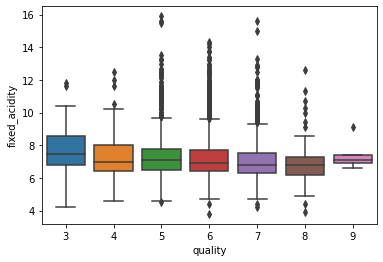

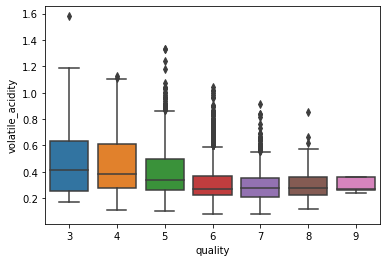

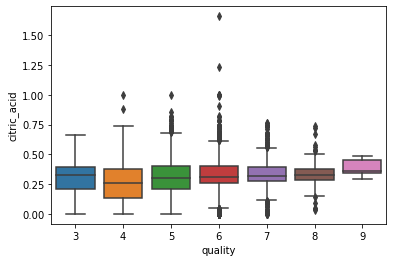

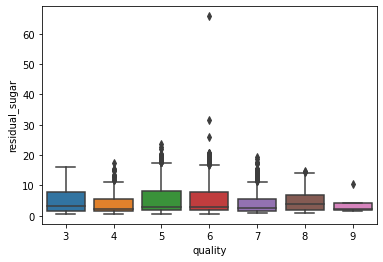

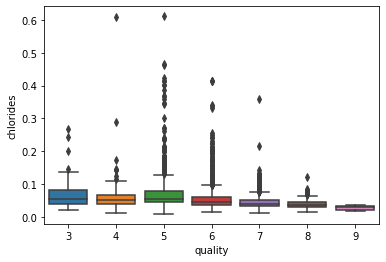

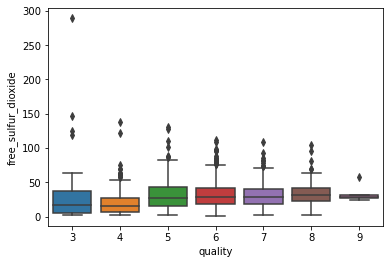

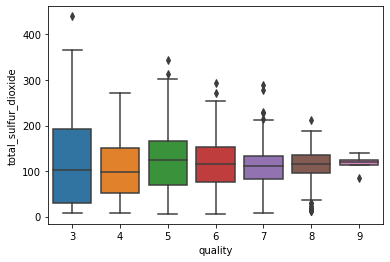

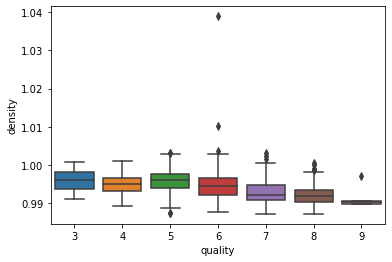

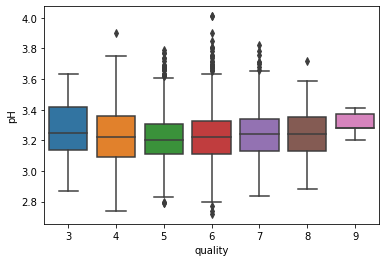

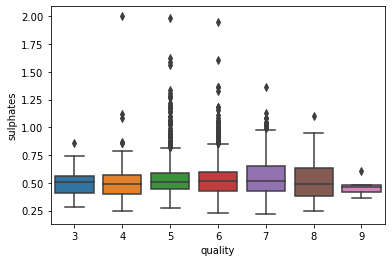

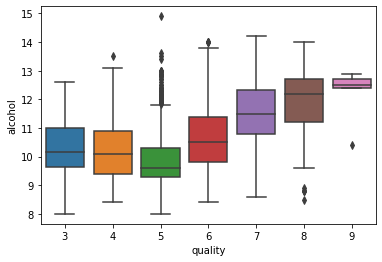

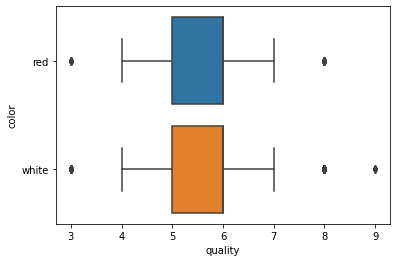

In [12]:
# check for outliers // Box Plots

for col in data_wine.columns:
    if col == 'quality':
        pass
    else:
        plt.figure()
        sns.boxplot(x='quality', y=col, data=data_wine)

In [13]:
# check data 
data_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


* It may seem that residual sugar has an outlier with the value 289. But after going through the <a href='https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too#:~:text=Simply%20put%2C%20Total%20Sulfur%20Dioxide,aldehydes%2C%20pigments%2C%20or%20sugars.'>article</a> we acquired the information that "The maximum allowable concentration for a bottled wine is 350 ppm (mg/L) of TSO2". Hence the value is perfectly fine, thus not an outlier.
* Rest all the data doesn't seems irregular, therefor we come to a conclusion that there are no outliers in the data set.

## Feature Engineering

In [14]:
def low_high(x):
    '''
    
    Author : Niladri Ghosh
    Email : niladri1406@gmail.com
    
    
    A function that takes in a single argument, a dataframe, then creates a extra column with data "(column_name)_level" 
    which describes whether the values in the data are low , medium, mod_high or high. The values are calculated against 
    the whole columns statistical data. We use .describe() method to fetch the values for min, 25%, 50% and so on. For 
    instance creating a column for pH values, the higher the value the lower is the concentration level and for the 
    the remaining columns its the other was i.e, higher the values high terminology denoted.
    
    level          pH          rest of the columns
    
    min - 25%      high        low
    25% - 50%      mod_high    medium
    50% - 75%      medium      mod_high
    75% - max      low         high
    
    
    '''
    
    
    for col in x.columns:
        if col == 'pH':
            bin_edges = [x[col].describe()['min']-0.001, x[col].describe()['25%'], x[col].describe()['50%'], 
                         x[col].describe()['75%'], x[col].describe()['max']]
            bin_names = ['high', 'mod_high', 'medium', 'low']
            x[col+"_level"] = pd.cut(x[col], bin_edges, labels=bin_names)
        
        elif col == 'quality' or col == 'color':
            pass
        
        else:
            bin_edges = [x[col].describe()['min']-0.001, x[col].describe()['25%'], x[col].describe()['50%'], 
                         x[col].describe()['75%'], x[col].describe()['max']]
            bin_names = ['low', 'medium', 'mod_high', 'high' ]
            x[col+"_level"] = pd.cut(x[col], bin_edges, labels=bin_names)


In [15]:
# create columns with feaures
low_high(data_wine)

In [16]:
data_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,volatile_acidity_level,citric_acid_level,residual_sugar_level,chlorides_level,free_sulfur_dioxide_level,total_sulfur_dioxide_level,density_level,pH_level,sulphates_level,alcohol_level
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,high,low,medium,high,medium,low,high,mod_high,high,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,high,low,medium,high,low,low,high,medium,high,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,medium,high,medium,high,medium,low,high,mod_high,mod_high,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,high,low,medium,high,low,low,high,low,mod_high,low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,...,high,low,low,high,low,low,high,low,mod_high,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,low,medium,low,medium,medium,medium,low,medium,medium,mod_high
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,mod_high,mod_high,high,medium,high,high,mod_high,mod_high,medium,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,medium,low,low,medium,mod_high,medium,medium,high,medium,low
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,...,medium,medium,low,low,medium,medium,low,low,low,high


In [18]:
data_wine.shape

(5320, 24)